# 실습 2: MNIST CNN - 99% 돌파!

**목표**: CNN으로 MNIST 99% 달성

---

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow: {tf.__version__}")

TensorFlow: 2.19.0


In [12]:
!apt-get install -y fonts-nanum > /dev/null 2>&1

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정 완료!")

한글 폰트 설정 완료!


## Step 1: 데이터 준비

In [13]:
# MNIST 로드
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# CNN은 (높이, 너비, 채널) 형태 필요
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print(f"학습 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")

학습 데이터: (60000, 28, 28, 1)
테스트 데이터: (10000, 28, 28, 1)


## Step 2: CNN 모델 만들기

In [14]:
model = keras.Sequential([
    # 첫 번째 Conv 블록
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # 두 번째 Conv 블록
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 세 번째 Conv 블록
    layers.Conv2D(64, (3, 3), activation='relu'),

    # 분류기
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # 과적합 방지
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Step 3: 학습

In [16]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7871 - loss: 0.6687 - val_accuracy: 0.9795 - val_loss: 0.0662
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9672 - loss: 0.1142 - val_accuracy: 0.9887 - val_loss: 0.0388
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9773 - loss: 0.0787 - val_accuracy: 0.9885 - val_loss: 0.0441
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9835 - loss: 0.0600 - val_accuracy: 0.9890 - val_loss: 0.0385
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9849 - loss: 0.0502 - val_accuracy: 0.9907 - val_loss: 0.0356
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9879 - loss: 0.0419 - val_accuracy: 0.9897 - val_loss: 0.0364
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9891 - loss: 0.0364 - val_accuracy: 0.9917 - val_loss: 0.0302
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9905 - loss: 0.0319 - val_accuracy: 0

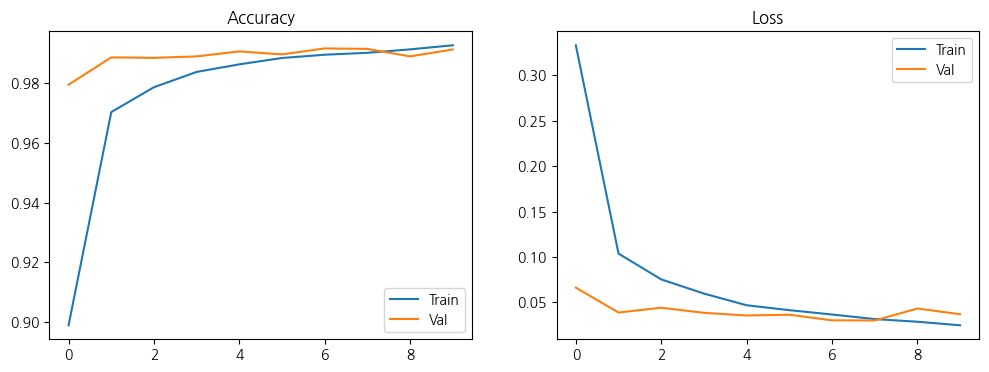

In [17]:
# 학습 그래프
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Val')
axes[0].set_title('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Val')
axes[1].set_title('Loss')
axes[1].legend()
plt.show()

## Step 4: 평가

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n테스트 정확도: {test_acc:.2%}")

if test_acc >= 0.99:
    print("축하합니다! 99% 달성!")
else:
    print(f"99%까지 {0.99 - test_acc:.2%} 남았습니다.")


테스트 정확도: 99.20%
축하합니다! 99% 달성!


## 필터 시각화 (보너스)

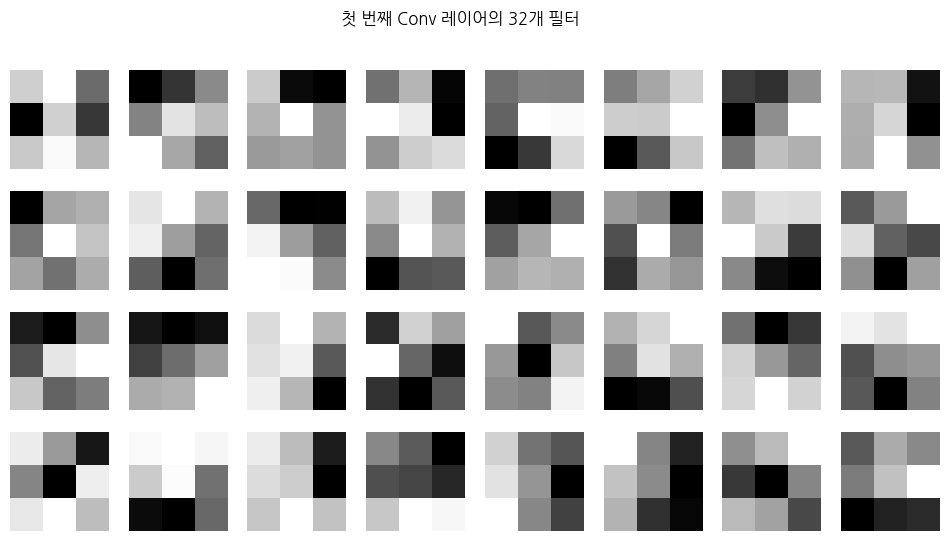

In [19]:
# 첫 번째 Conv 레이어의 필터 시각화
filters = model.layers[0].get_weights()[0]

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < 32:
        ax.imshow(filters[:, :, 0, i], cmap='gray')
    ax.axis('off')
plt.suptitle('첫 번째 Conv 레이어의 32개 필터')
plt.show()

In [20]:
import base64
from io import BytesIO
from PIL import Image
from google.colab import output
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt

canvas_html = """
<style>
  #canvas-container { text-align: center; margin: 20px; }
  #draw-canvas { border: 2px solid #333; cursor: crosshair; background: black; }
  button { margin: 5px; padding: 10px 20px; font-size: 16px; }
</style>
<div id=\"canvas-container\">
  <h3>마우스로 숫자를 그려보세요! (0~9)</h3>
  <canvas id=\"draw-canvas\" width=\"280\" height=\"280\"></canvas><br>
  <button onclick=\"clearCanvas()\">지우기</button>
  <button onclick=\"predict()\">예측하기</button>
</div>
<script>
  var canvas = document.getElementById('draw-canvas');
  var ctx = canvas.getContext('2d');
  var drawing = false;
  ctx.fillStyle = 'black';
  ctx.fillRect(0, 0, 280, 280);
  ctx.strokeStyle = 'white';
  ctx.lineWidth = 20;
  ctx.lineCap = 'round';
  canvas.onmousedown = function(e) { drawing = true; ctx.beginPath(); ctx.moveTo(e.offsetX, e.offsetY); };
  canvas.onmousemove = function(e) { if(drawing) { ctx.lineTo(e.offsetX, e.offsetY); ctx.stroke(); } };
  canvas.onmouseup = function() { drawing = false; };
  canvas.onmouseout = function() { drawing = false; };
  function clearCanvas() { ctx.fillStyle = 'black'; ctx.fillRect(0, 0, 280, 280); }
  function predict() { google.colab.kernel.invokeFunction('notebook.predict_digit', [canvas.toDataURL('image/png')], {}); }
</script>
"""

def predict_digit(data_url):
    img_data = base64.b64decode(data_url.split(',')[1])
    img = Image.open(BytesIO(img_data)).convert('L')
    img = img.resize((28, 28), Image.Resampling.LANCZOS)

    # Normalize the image data to 0-1, similar to how X_train was preprocessed
    # Correcting the reshape to (1, 28, 28, 1) for the CNN model
    img_array = np.array(img).reshape(1, 28, 28, 1).astype('float32') / 255.0

    predictions = model.predict(img_array, verbose=0) # Get probability distribution
    predicted_class = np.argmax(predictions[0]) # Get the class with the highest probability
    confidence = predictions[0][predicted_class] * 100 # Get the confidence for the predicted class

    print(f"\n{'='*35}")
    print(f"예측 결과: {predicted_class}")
    print(f"확신도: {confidence:.1f}%")
    print(f"{'='*35}")

    plt.figure(figsize=(3, 3))
    # Reshape img_array for displaying, it's already 0-1
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f'모델이 본 이미지 -> 예측: {predicted_class}')
    plt.axis('off')
    plt.show()

output.register_callback('notebook.predict_digit', predict_digit)
display(HTML(canvas_html))

---
## 완료!

CNN으로 **~99%** 정확도 달성!

**Dense vs CNN**
- Dense: ~97%
- CNN: ~99%

CNN이 이미지에서 더 좋은 이유: 공간 정보 보존, 필터 공유